In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_OF_segment1_workflowS2_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,1126888|499828|767443,Send for Assessment,Send for Assessment,17/12/2019 14:06:44,PRESTONZ,Academic Services,9,N,1. App to Assessment,Part 1 - Application ID Workflow,...,MCW,HDCW,Full Degree,OF,OF,Y,NaN,Y,21 days 21 hours 36 minutes 6 seconds,1892166.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Created - Acceptance agreement (International)',
 'AR - Created - Advanced standing application',
 'AR - Created - Assessment information (Coursework) (1)',
 'AR - Created - Assessment information (Coursework) (2)',
 'AR - Created - CONDITIONAL Acceptance agreement (International)',
 'AR - Created - Credit for previous study',
 'AR - Created - Credit for previous study - non-University of Melbourne students',
 'AR - Created - Curriculum Vitae',
 'AR - Created - Entry points (Master of Information Systems)',
 'AR - Created - Evidence of course completion',
 'AR - Created - Full application for Coursework program (1)',
 'AR - Created - Further information (1)',
 'AR - Created - Further information (2)',
 'AR - Created - Further information (3)',
 'AR - Created - Further information (4)',
 'AR - Created - Further information - Agent nomination form',
 'AR - Created - Further information - Pakistan Applicants require an Agent',
 'AR - Created - Further information - Syllabus require

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

10305

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,AR - Requested - Appointment of authorised representative,OC - Created - Evidence of course completion,OC - Satisfied - CHESICC transcript authentication for international students,AR - Not Satisfied - Appointment of authorised representative,AR - Requested - Further information (2),AR - Requested - Assessment information (Coursework) (1),Assessment Outcome - DO NOT USE,AR - Satisfied - Employer reference letter,AR - Satisfied - Curriculum Vitae and professional experience,Back to Perform Assessment,...,AR - Satisfied - Further information (5),Put Triage On-Hold,AR - Requested - Further information - Pakistan Applicants require an Agent,OC - Not Satisfied - English language requirements,AR - Requested - Further information (1),AR - Satisfied - Further information - Transcript translation and original language,AR - Reviewed - Specialisation (Master of Information Technology),AR - Satisfied - Advanced standing application,AR - Satisfied - Grading scale,AR - Satisfied - Details of authorised representative
1002737|412325|639241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050720|398554|619925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1131292|505708|776069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1145779|525274|804968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039184|383779|597687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900721|516545|792103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101188|468861|720042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1161932|551188|843334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088328|452037|694719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

10305

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,AR - Requested - Appointment of authorised representative,OC - Created - Evidence of course completion,OC - Satisfied - CHESICC transcript authentication for international students,AR - Not Satisfied - Appointment of authorised representative,AR - Requested - Further information (2),AR - Requested - Assessment information (Coursework) (1),Assessment Outcome - DO NOT USE,AR - Satisfied - Employer reference letter,AR - Satisfied - Curriculum Vitae and professional experience,Back to Perform Assessment,...,AR - Satisfied - Further information (5),Put Triage On-Hold,AR - Requested - Further information - Pakistan Applicants require an Agent,OC - Not Satisfied - English language requirements,AR - Requested - Further information (1),AR - Satisfied - Further information - Transcript translation and original language,AR - Reviewed - Specialisation (Master of Information Technology),AR - Satisfied - Advanced standing application,AR - Satisfied - Grading scale,AR - Satisfied - Details of authorised representative
1002737|412325|639241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050720|398554|619925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131292|505708|776069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1145779|525274|804968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1039184|383779|597687,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900721|516545|792103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1101188|468861|720042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1161932|551188|843334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1088328|452037|694719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Assessment Outcome - Successful')
features.remove('Assessment Outcome - Not Successful')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Assessment Outcome - Successful'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

189
187


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[895  97]
 [ 79 914]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       992
           1       0.90      0.92      0.91       993

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985



In [28]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

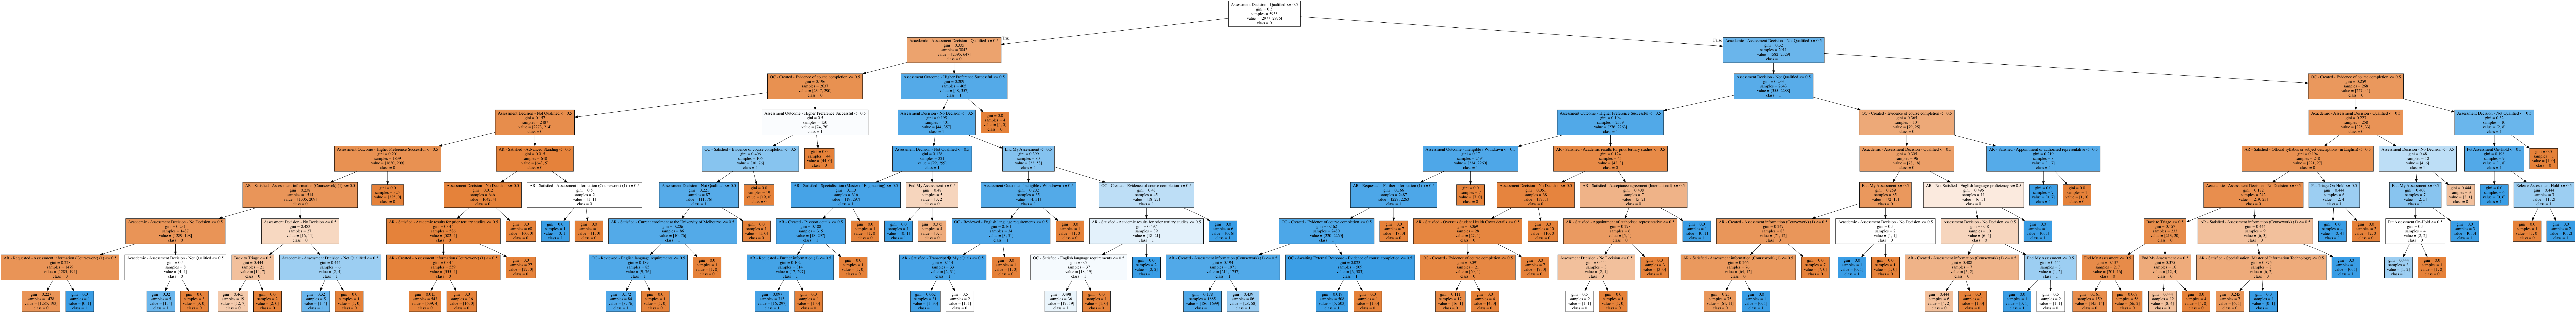

In [29]:
# Show graph
Image(graph.create_png())

In [30]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS2_decisiontree.png")







True

In [14]:
zero_one_table['Assessment Outcome - Successful'].value_counts()

1    6336
0    3969
Name: Assessment Outcome - Successful, dtype: int64

In [15]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Assessment Outcome - Successful']==1]
zero_one_table_minority = df[zero_one_table['Assessment Outcome - Successful']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=3969,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Assessment Outcome - Successful'].value_counts()

1    3969
0    3969
Name: Assessment Outcome - Successful, dtype: int64

In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Assessment Outcome - Successful'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9113350125944585


In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[895  97]
 [ 79 914]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       992
           1       0.90      0.92      0.91       993

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985



In [23]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

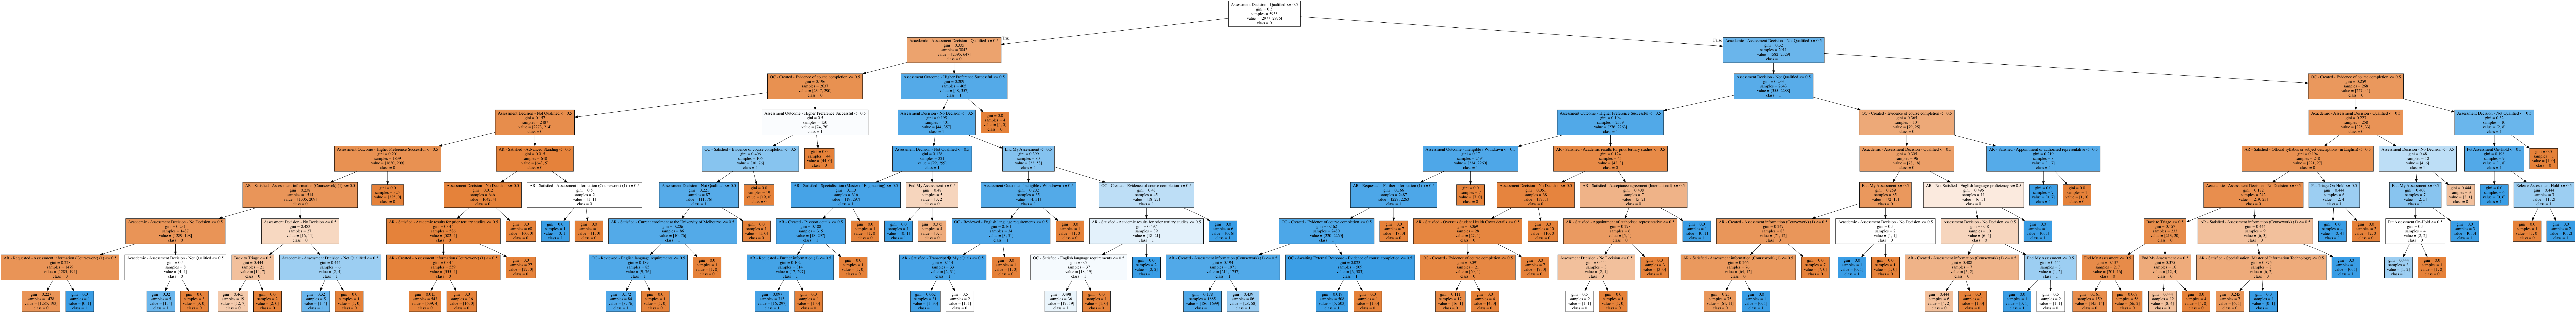

In [24]:
# Show graph
Image(graph.create_png())

In [25]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS2_decisiontree_downsampled.png")

True